<a href="https://colab.research.google.com/github/guedesiw/air-quality-india/blob/master/Detec%C3%A7%C3%A3oDeImagem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

--2020-05-09 16:45:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   229MB/s    in 0.3s    

2020-05-09 16:45:16 (229 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.42.jpg', 'cat.120.jpg', 'cat.746.jpg', 'cat.706.jpg', 'cat.478.jpg', 'cat.634.jpg', 'cat.212.jpg', 'cat.777.jpg', 'cat.52.jpg', 'cat.968.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

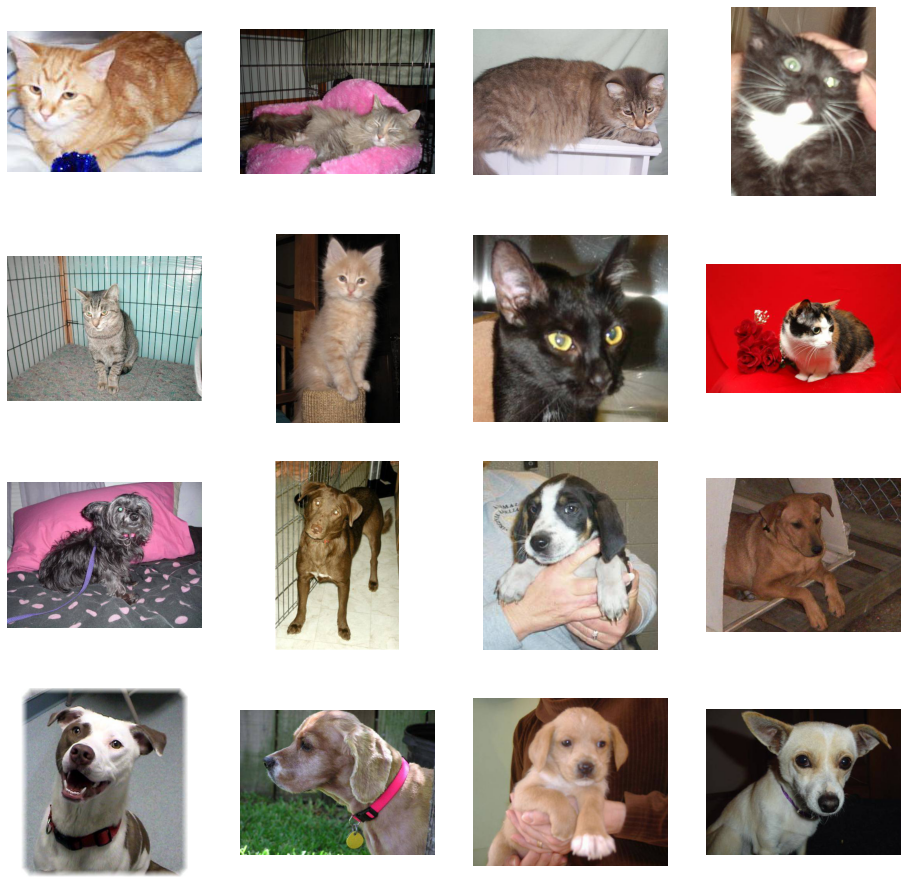

In [0]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
img_input = layers.Input(shape=(150, 150, 3))

In [0]:
x = layers.Conv2D(16, 3, activation='relu')(img_input) #Retira da imagem 16 matrizes de 3x3. Relu recebe como parametro a camada anterior img_input. Criando uma pilha para demonstrar que as camadas estão conectadas.
x = layers.MaxPooling2D(2)(x)  #16 filtros/matrizes de 3x3 transformados em 16 filtros/matrizes de 2x2

In [0]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [0]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [0]:
x = layers.Flatten()(x)

In [0]:
0
x = layers.Dense(512, activation='relu')(x)

In [0]:
output = layers.Dense(1, activation='sigmoid')(x)

In [0]:
model = Model(img_input, output)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0     

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', # organiza o erro da rede neural.
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 59s - loss: 0.7897 - acc: 0.5615 - val_loss: 0.6639 - val_acc: 0.6280
Epoch 2/15
100/100 - 59s - loss: 0.6262 - acc: 0.6630 - val_loss: 0.5810 - val_acc: 0.6970
Epoch 3/15
100/100 - 59s - loss: 0.5509 - acc: 0.7195 - val_loss: 0.5801 - val_acc: 0.7010
Epoch 4/15
100/100 - 59s - loss: 0.4489 - acc: 0.7785 - val_loss: 0.6654 - val_acc: 0.6750
Epoch 5/15
100/100 - 59s - loss: 0.3708 - acc: 0.8250 - val_loss: 0.7269 - val_acc: 0.6710
Epoch 6/15
100/100 - 59s - loss: 0.2839 - acc: 0.8780 - val_loss: 0.6814 - val_acc: 0.7130
Epoch 7/15
100/100 - 59s - loss: 0.1885 - acc: 0.9260 - val_loss: 1.4993 - val_acc: 0.6710
Epoch 8/15
100/100 - 59s - loss: 0.1464 - acc: 0.9425 - val_loss: 0.9279 - val_acc: 0.7220
Epoch 9/15
100/100 - 59s - loss: 0.0971 - acc: 0.9690 - val_loss: 1.1012 - val_acc: 0.7120
Epoch 10/15
100/100 - 59s - loss: 0.0820 - acc: 0.9720 - val_loss: 1.5780 - val_acc: 0.7030
Epoch 11/15
1

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


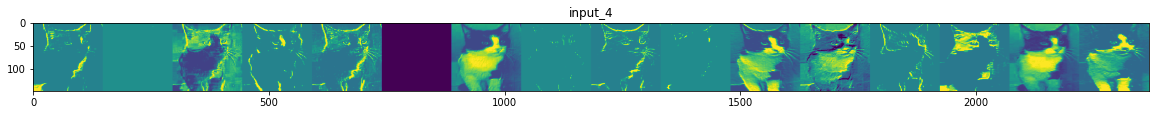

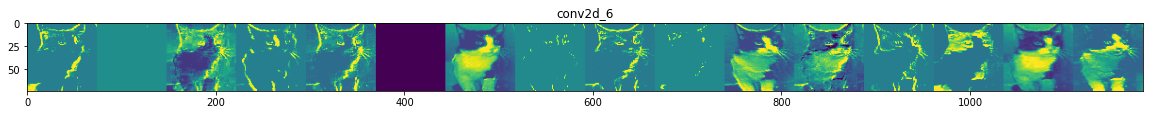

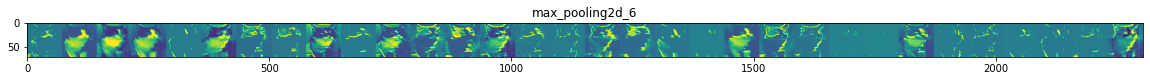

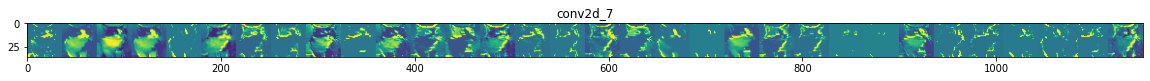

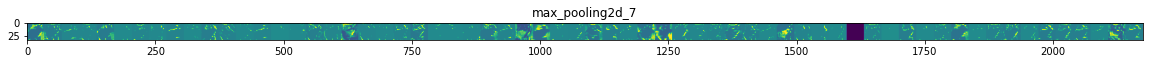

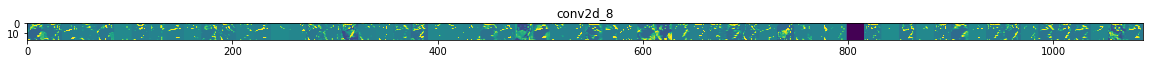

In [0]:
x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')